# UKHSA  Technical Task
###  Wilson adejo
###  14-09-2023


## Contents

### <a href='#1'>1. Read in the dataset</a>
             
### <a href='#2'>2. Exploration Data Analysis</a>

### <a href='#3'>3. Data Preprocessing & Feature Engineering</a>
 
### <a href='#4'>4. Data Analysis</a>
    
### <a href='#5'>5.Modelling and Evaluation</a>
      


In [110]:
#importing the necessary  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import sklearn as sk
import datetime 
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR,SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, r2_score

from sklearn.preprocessing import LabelEncoder

#import geopandas
import shapely
import missingno as msn

%matplotlib inline



## <a id='1'>1. Read in the dataset</a>



In [73]:
# Import the dataset and remove leading/trailing whitespaces 
df=pd.read_csv("2023_Autumn_SEO_dataset.csv",skipinitialspace = True)

print("The shape of data is:",(df.shape))
df.sample(3)  # sample  show the data randomly


The shape of data is: (10000, 11)


,Patient ID,Age,Gender,Weight,Height,Occupation,Alcohol Use,Physical Activity,Admitted To Icu,Rash?,Dizziness?
8130,468615,21,male,75.3,168.0,Lathe Operator,low risk,meets aerobic guidelines,False,severe,mild
53,109972,62,male,81.7,175.7,Picture Reseacher,non-drinker,meets aerobic guidelines,False,none,none
6346,50697,32,male,70.7,180.0,Property Dealer,high risk,meets aerobic guidelines,True,severe,mild



## <a id='2'>2. Exploration Data Analysis</a>

This section contain the exploratory data analysis carried out to have a general overview of the dataset.

In [74]:
## Quick summary
print(df.count())  # Count the Number of Non-Missing Values for each Variable
print(df.shape)
df.describe().style.background_gradient(cmap='rainbow')      #gives the summary of all the numerical variables present in


Patient ID           10000
Age                  10000
Gender                9947
Weight                9956
Height               10000
Occupation           10000
Alcohol Use          10000
Physical Activity    10000
Admitted To Icu      10000
Rash?                10000
Dizziness?           10000
dtype: int64
(10000, 11)


,Patient ID,Age,Weight,Height
count,10000.000000,10000.000000,9956.000000,10000.000000
mean,499999.212800,44.167400,74.505082,168.518420
std,288689.735465,31.286004,12.181599,9.307245
min,57.000000,18.000000,45.000000,145.300000
25%,250037.000000,30.000000,66.300000,161.300000
50%,500015.500000,43.000000,75.100000,168.400000
75%,750018.500000,56.000000,83.500000,175.500000
max,999957.000000,2700.000000,109.200000,197.400000


In [75]:
# Checking the various data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient ID         10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Gender             9947 non-null   object 
 3   Weight             9956 non-null   float64
 4   Height             10000 non-null  float64
 5   Occupation         10000 non-null  object 
 6   Alcohol Use        10000 non-null  object 
 7   Physical Activity  10000 non-null  object 
 8   Admitted To Icu    10000 non-null  bool   
 9   Rash?              10000 non-null  object 
 10  Dizziness?         10000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
# Using ProfileReport to have a quick overview of the data and save as output.html file 
profile = pp.ProfileReport(df) 
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient ID         10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Gender             9947 non-null   object 
 3   Weight             9956 non-null   float64
 4   Height             10000 non-null  float64
 5   Occupation         10000 non-null  object 
 6   Alcohol Use        10000 non-null  object 
 7   Physical Activity  10000 non-null  object 
 8   Admitted To Icu    10000 non-null  bool   
 9   Rash?              10000 non-null  object 
 10  Dizziness?         10000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


## <a id='3'>3. Data Preprocessing & Feature Engineering</a>

In [76]:
df.drop(['Patient ID'], inplace=True, axis=1, errors='ignore')

In [77]:
#Check the number of NA
df.isna().sum()

Age                   0
Gender               53
Weight               44
Height                0
Occupation            0
Alcohol Use           0
Physical Activity     0
Admitted To Icu       0
Rash?                 0
Dizziness?            0
dtype: int64

In [78]:
## Fill the missing  values using mean and Last observation carried forward (LOCF)
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [79]:
df.isna().sum()

Age                  0
Gender               0
Weight               0
Height               0
Occupation           0
Alcohol Use          0
Physical Activity    0
Admitted To Icu      0
Rash?                0
Dizziness?           0
dtype: int64

In [80]:
# Renaming Columns
column_mapping = {'Alcohol Use': 'Alcohol_Use', 'Physical Activity': 'Physical_Activity', 'Admitted To Icu': 'Admitted_To_Icu'}
df.rename(columns=column_mapping, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   Weight             10000 non-null  float64
 3   Height             10000 non-null  float64
 4   Occupation         10000 non-null  object 
 5   Alcohol_Use        10000 non-null  object 
 6   Physical_Activity  10000 non-null  object 
 7   Admitted_To_Icu    10000 non-null  bool   
 8   Rash?              10000 non-null  object 
 9   Dizziness?         10000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 713.0+ KB


## <a id='4'>4. Data Analysis</a>

### Grouping By Columns

<Axes: xlabel='Alcohol_Use', ylabel='count'>

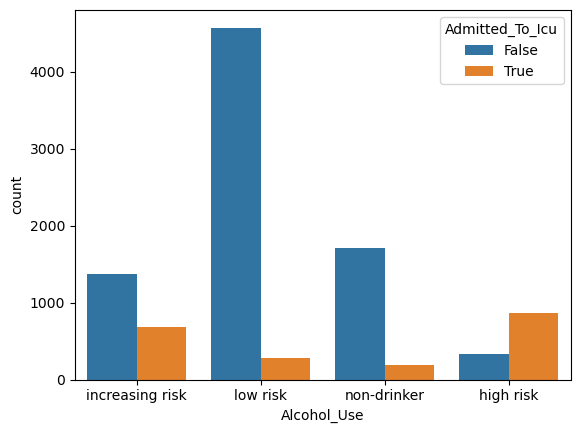

In [82]:
## Lets visualise admited to Icu parameter
sns.countplot(data=df, x='Alcohol_Use',hue ='Admitted_To_Icu')

#### A. Gender  and ICU Admission

In [83]:
df.groupby('Gender').count()

,Age,Weight,Height,Occupation,Alcohol_Use,Physical_Activity,Admitted_To_Icu,Rash?,Dizziness?
Gender,,,,,,,,,
female,4790,4790,4790,4790,4790,4790,4790,4790,4790
male,4422,4422,4422,4422,4422,4422,4422,4422,4422
other,93,93,93,93,93,93,93,93,93
prefer not to say,695,695,695,695,695,695,695,695,695


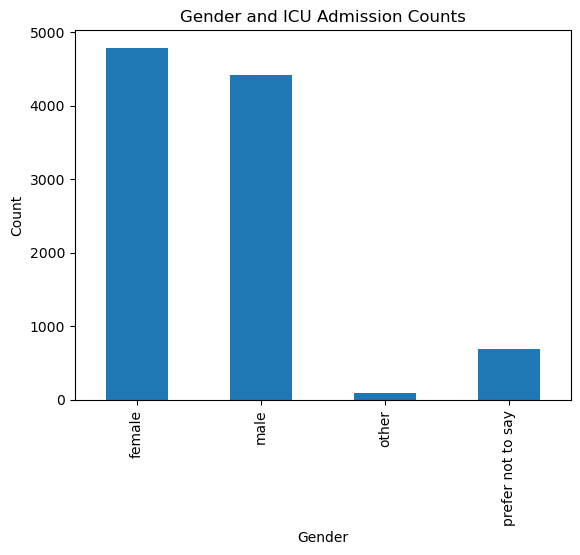

In [84]:
gender_counts = df.groupby('Gender')['Admitted_To_Icu'].count()

# Plot the results as a bar chart
gender_counts.plot(kind='bar', title='Gender and ICU Admission Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Weight vs. Height')

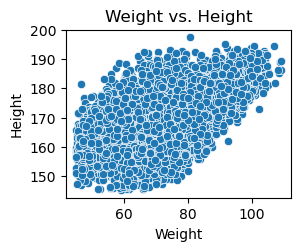

In [86]:
# Scatter plot of Weight vs. Height
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="Weight", y="Height")
plt.title("Weight vs. Height")


#### B. Count of Alcohol use


In [87]:
Alcohol_df=df.groupby('Alcohol_Use').Gender.count()
Alcohol_df

Alcohol_Use
high risk          1197
increasing risk    2061
low risk           4846
non-drinker        1896
Name: Gender, dtype: int64

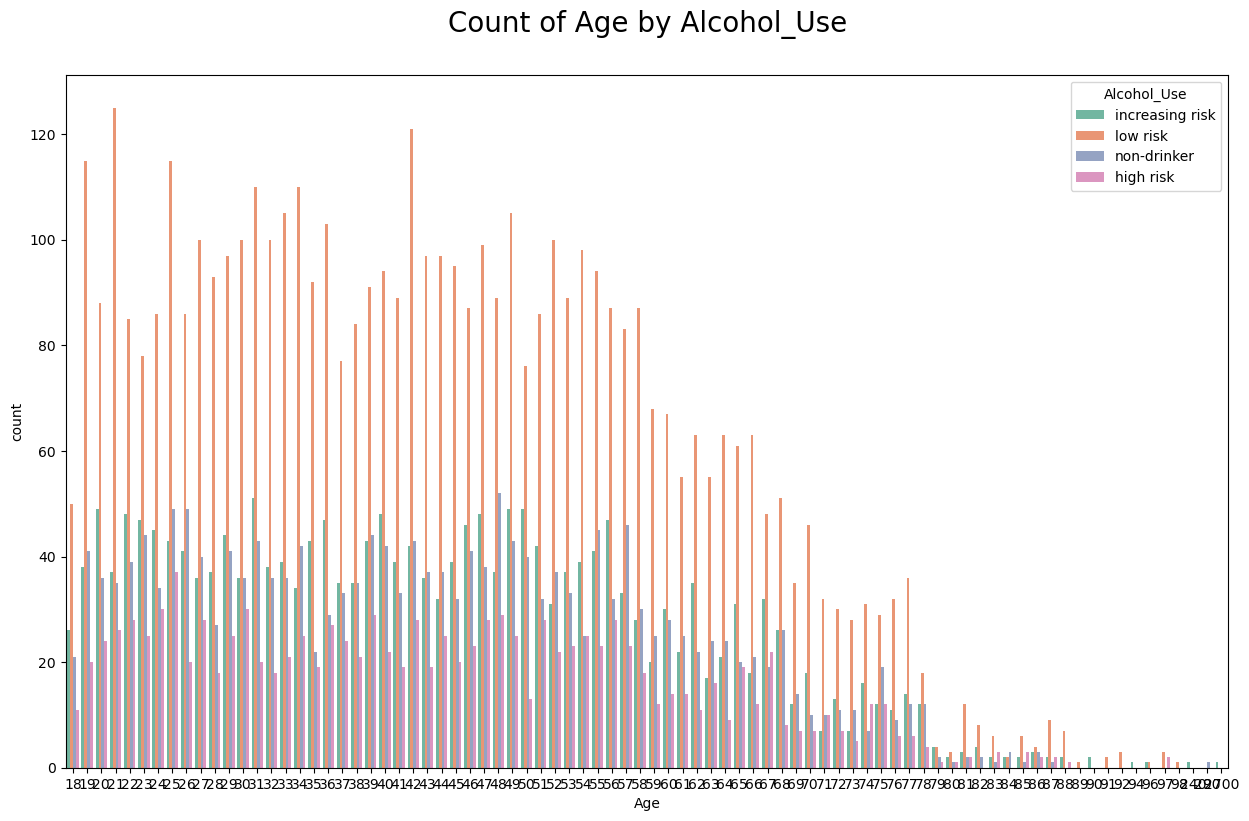

In [88]:

plt.figure(figsize=(15,9))
sns.countplot(x='Age', hue='Alcohol_Use', data=df ,palette="Set2")
plt.title('Count of Age by Alcohol_Use', size=20, y=1.05)
plt.show()

#### * Count and percentage of Admitted_To_Icu class

In [89]:
Admitted_To_Icu_class=df.groupby('Alcohol_Use').Admitted_To_Icu.count()
Admitted_To_Icu_class

Alcohol_Use
high risk          1197
increasing risk    2061
low risk           4846
non-drinker        1896
Name: Admitted_To_Icu, dtype: int64

#### Plot number of  Alcohol_Use and Admitted

Text(0, 0.5, 'Admitted_To_Icu')

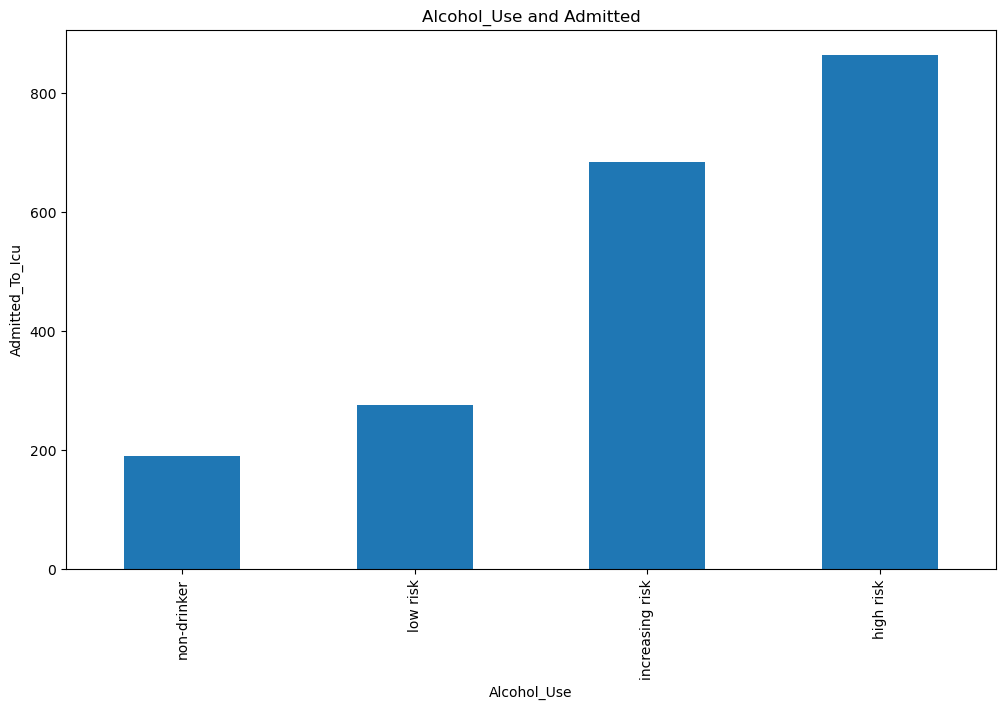

In [90]:
df.groupby("Alcohol_Use")['Admitted_To_Icu'].sum().sort_values(ascending=True).plot(kind='bar',figsize = (12,7),title = 'Alcohol_Use and Admitted')
plt.ylabel("Admitted_To_Icu")

<Axes: title={'center': 'Age'}, xlabel='Admitted_To_Icu'>

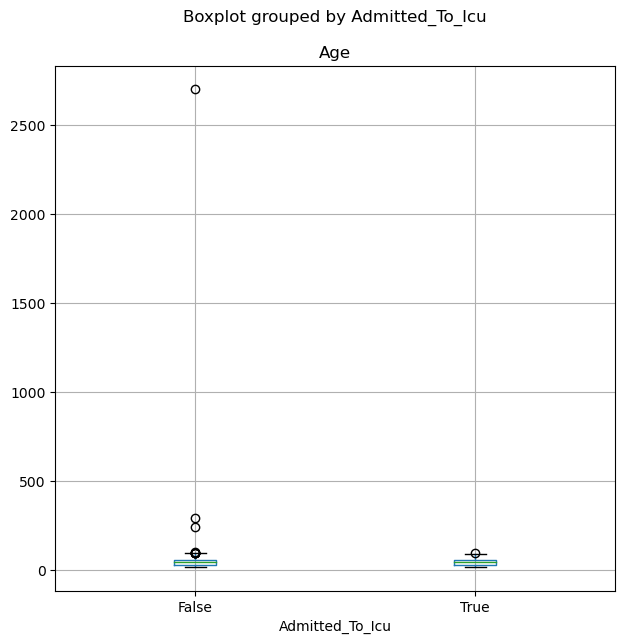

In [106]:
# Check the age against Admitted_To_Icu
df.boxplot(column= 'Age', by ='Admitted_To_Icu', figsize=(7,7))

<Axes: xlabel='Admitted_To_Icu', ylabel='Age'>

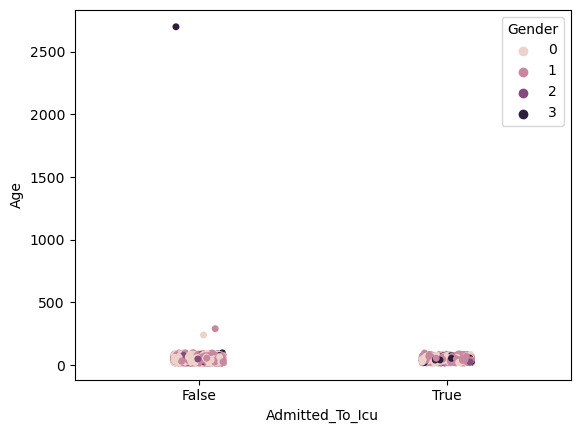

In [108]:
# Check the Age and Gender against Admittance
sns.stripplot(data=df, y='Age', x ='Admitted_To_Icu', hue='Gender')


## <a id='5'> 5. Modelling and Evaluation</a>

### 5.1 Encoding the categorical variables

In [91]:
# cast categorical features - currently stored as string data - to their proper data format

from sklearn.preprocessing import LabelEncoder
    
categ = ['Gender', 'Alcohol_Use', 'Occupation', 'Physical_Activity','Rash?','Dizziness?']
# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)   
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Weight             10000 non-null  float64
 3   Height             10000 non-null  float64
 4   Occupation         10000 non-null  int32  
 5   Alcohol_Use        10000 non-null  int32  
 6   Physical_Activity  10000 non-null  int32  
 7   Admitted_To_Icu    10000 non-null  bool   
 8   Rash?              10000 non-null  int32  
 9   Dizziness?         10000 non-null  int32  
dtypes: bool(1), float64(2), int32(6), int64(1)
memory usage: 478.6 KB


### 5.2 Finding the  correlation matrix

In [92]:
# finding the  correlation matrix
# plot correlation heatmap to find out correlations
import matplotlib.pyplot as plt
import seaborn as sns

correlation =df.corr().style.background_gradient(cmap='coolwarm')
correlation

,Age,Gender,Weight,Height,Occupation,Alcohol_Use,Physical_Activity,Admitted_To_Icu,Rash?,Dizziness?
Age,1.000000,0.021934,0.007601,-0.002988,0.013619,-0.006403,-0.009123,-0.008371,0.008543,-0.002348
Gender,0.021934,1.000000,0.281737,0.415052,0.012781,-0.006071,0.011065,0.006168,0.011218,0.008242
Weight,0.007601,0.281737,1.000000,0.579492,0.003517,0.315872,-0.000703,-0.661603,-0.028245,0.007194
Height,-0.002988,0.415052,0.579492,1.000000,0.006115,-0.019222,0.011535,0.028918,0.015249,0.001260
Occupation,0.013619,0.012781,0.003517,0.006115,1.000000,0.001842,0.005766,-0.005159,0.000107,-0.009255
Alcohol_Use,-0.006403,-0.006071,0.315872,-0.019222,0.001842,1.000000,-0.004804,-0.473311,-0.022653,-0.011308
Physical_Activity,-0.009123,0.011065,-0.000703,0.011535,0.005766,-0.004804,1.000000,0.001907,0.000528,0.000676
Admitted_To_Icu,-0.008371,0.006168,-0.661603,0.028918,-0.005159,-0.473311,0.001907,1.000000,0.045437,-0.005972
Rash?,0.008543,0.011218,-0.028245,0.015249,0.000107,-0.022653,0.000528,0.045437,1.000000,0.013537
Dizziness?,-0.002348,0.008242,0.007194,0.001260,-0.009255,-0.011308,0.000676,-0.005972,0.013537,1.000000


In [93]:
# Rearrange columns

df1=df[['Age','Gender','Height', 'Alcohol_Use', 'Occupation', 'Physical_Activity','Rash?','Dizziness?','Admitted_To_Icu']]

df1.head()

,Age,Gender,Height,Alcohol_Use,Occupation,Physical_Activity,Rash?,Dizziness?,Admitted_To_Icu
0,45,0,170.9,1,998,2,1,1,False
1,28,3,156.8,2,855,2,2,0,False
2,39,1,175.5,2,506,2,3,0,False
3,78,1,179.0,2,732,0,2,2,False
4,23,3,159.8,1,311,2,2,2,False


# Exploartory data analysis 2

<Axes: >

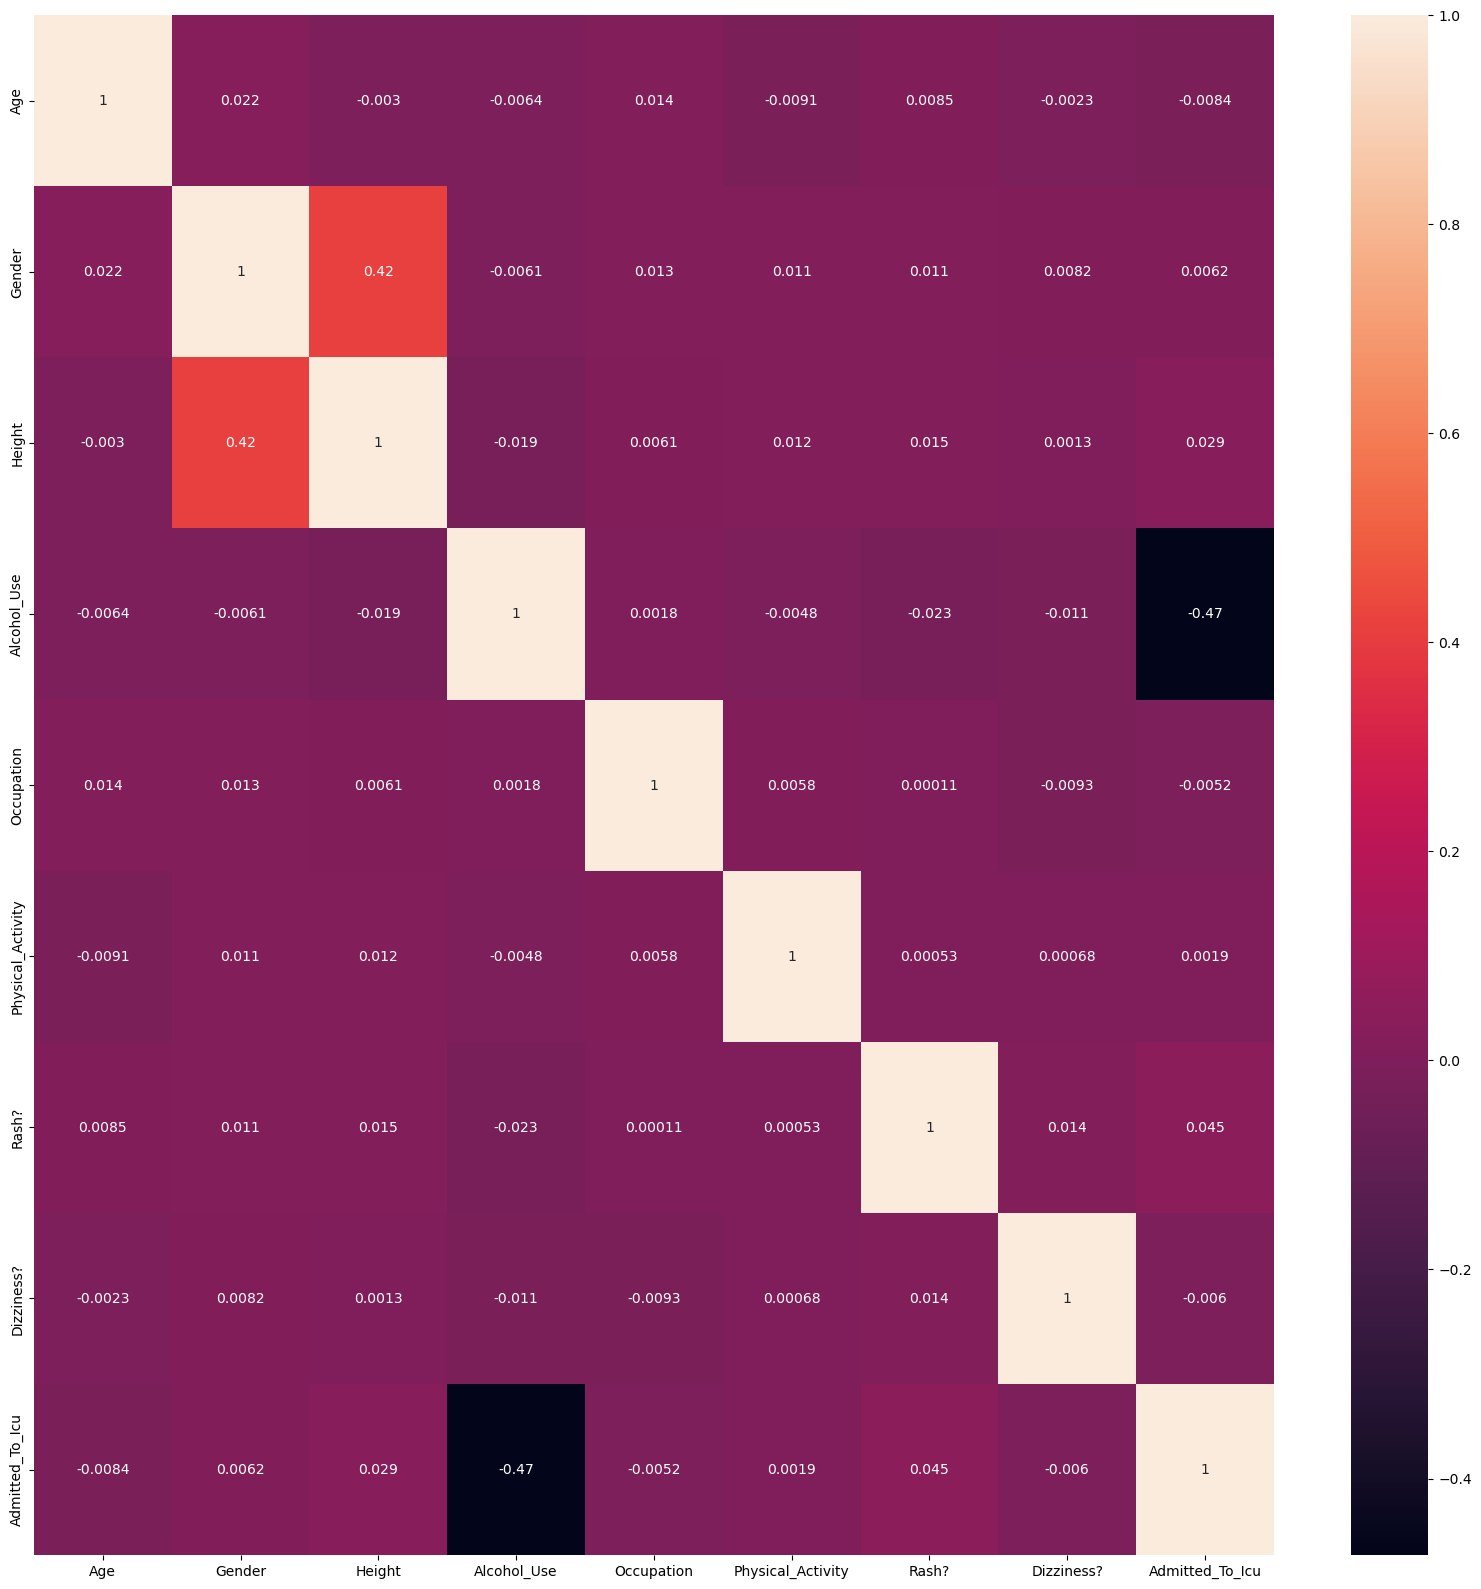

In [94]:
# finding the  correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df1.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation,annot=True)

In [95]:
# sorting the correlation in descending order
correlation['Admitted_To_Icu'].sort_values(ascending=False)

Admitted_To_Icu      1.000000
Rash?                0.045437
Height               0.028918
Gender               0.006168
Physical_Activity    0.001907
Occupation          -0.005159
Dizziness?          -0.005972
Age                 -0.008371
Alcohol_Use         -0.473311
Name: Admitted_To_Icu, dtype: float64

# Model Building

#### Multi-Classification models  Comparison
The classification models evaluated are:

* Random Forest
* Linear Support Vector Machine
* Multinomial Naive Bayes
* Logistic Regression
* XGBoost classifier

In [96]:
X=df1[['Age','Gender','Height', 'Alcohol_Use', 'Occupation', 'Physical_Activity','Rash?','Dizziness?']]

y=df1['Admitted_To_Icu']

In [97]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGB Classifier': XGBClassifier()
}

# Train and evaluate classification models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Use accuracy and classification report for evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, zero_division=0)
    
    results[model_name] = {'Accuracy': accuracy, 'Classification Report': classification_rep}



In [99]:
# Model Evaluation
# Print the results and select the best-performing model based on accuracy and classification report.
for model_name, metrics in results.items():
    print(f'{model_name}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    print()

Decision Tree:
Accuracy: 0.802
Classification Report:               precision    recall  f1-score   support

       False       0.87      0.87      0.87      1569
        True       0.54      0.54      0.54       431

    accuracy                           0.80      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.80      0.80      0.80      2000


Random Forest:
Accuracy: 0.856
Classification Report:               precision    recall  f1-score   support

       False       0.88      0.95      0.91      1569
        True       0.74      0.52      0.61       431

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000


Support Vector Machine:
Accuracy: 0.7845
Classification Report:               precision    recall  f1-score   support

       False       0.78      1.00      0.88      1569
        True       0.00      0.00      0.00       431

    accu

# Method 2

In [100]:
X=df1[['Age','Gender','Height', 'Alcohol_Use', 'Occupation', 'Physical_Activity','Rash?','Dizziness?']]

y=df1['Admitted_To_Icu']

In [102]:
import xgboost as xgb

# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC()
lr_classifier = LogisticRegression()
xgb_classifier = xgb.XGBClassifier()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

# Calculate metrics for each classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

rf_precision = precision_score(y_test, rf_predictions)
svm_precision = precision_score(y_test, svm_predictions)
lr_precision = precision_score(y_test, lr_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)

rf_recall = recall_score(y_test, rf_predictions)
svm_recall = recall_score(y_test, svm_predictions)
lr_recall = recall_score(y_test, lr_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)

rf_f1_score = f1_score(y_test, rf_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# Create a DataFrame to display the results
data = {
    'Classifier': ['Random Forest', 'SVM', 'Logistic Regression', 'Xgboost'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy, xgb_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision,xgb_precision],
    'Recall': [rf_recall, svm_recall, lr_recall, xgb_recall],
    'F1 Score': [rf_f1_score, svm_f1_score, lr_f1_score, xgb_f1_score]
}

df2 = pd.DataFrame(data)

# Set the Classifier column as the index
df2.set_index('Classifier', inplace=True)

# Display the results
print(df2)

                     Accuracy  Precision    Recall  F1 Score
Classifier                                                  
Random Forest          0.8610   0.747573  0.535963  0.624324
SVM                    0.7845   0.000000  0.000000  0.000000
Logistic Regression    0.8435   0.743802  0.417633  0.534918
Xgboost                0.8540   0.727869  0.515081  0.603261


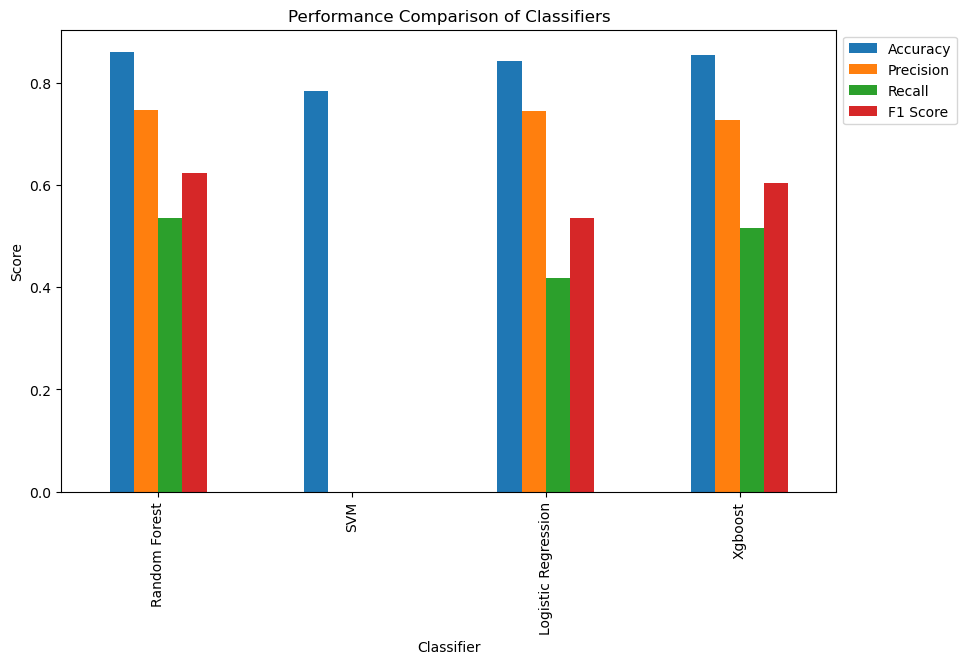

In [104]:
# Plot the bar chart
df2.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Comparison of Classifiers')
#plt.legend(loc='upper right')  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

# Method 2  Feature Importance using coefficient of model

In [49]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
feature_importance = rf_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)

In [51]:
top_n = 10  # Specify the number of top features to display
top_features = feature_df.head(top_n)
print(top_features)

             Feature  Importance
3        Alcohol_Use    0.291232
4         Occupation    0.175616
2             Height    0.170134
0                Age    0.146451
6              Rash?    0.127863
7         Dizziness?    0.035477
5  Physical_Activity    0.029838
1             Gender    0.023389


### Feature Importance Method2

In [111]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Perform permutation importance
result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean


# Print the feature importance scores
for feature, score in zip(X, importance_scores):
    print(f"{feature}: {score}")

Age: 0.002849999999999975
Gender: 0.0008999999999999786
Height: 0.00044999999999997267
Alcohol_Use: 0.11814999999999998
Occupation: 0.0022999999999999575
Physical_Activity: 0.002599999999999969
Rash?: 0.05114999999999997
Dizziness?: 0.0004999999999999672


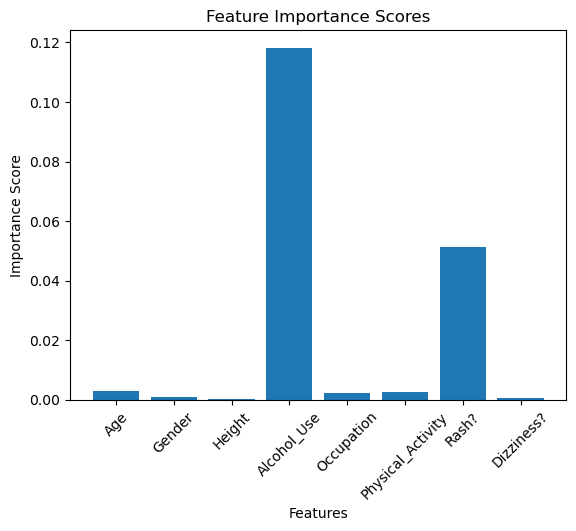

In [112]:
# Convert feature names and scores to lists
feature_names = list(X)
importance_scores = list(importance_scores)

# Plot the feature importance scores in a bar chart
plt.bar(feature_names, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()

##  Selecting  Random Forest Classifier  which is the best 

In [113]:
# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = classifier_rf.predict(X_test)

Accuracy: 86.10%
Confusion Matrix:
[[1491   78]
 [ 200  231]]


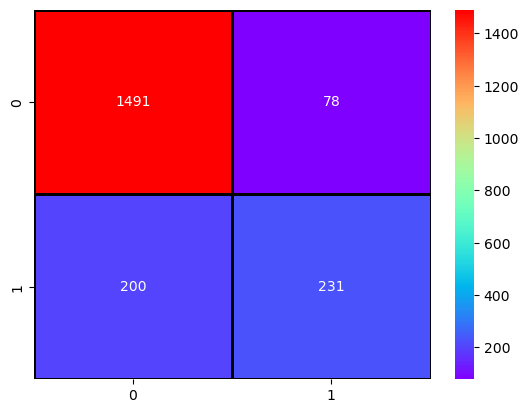

In [114]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
formatted_accuracy_rf = "{:.2%}".format(accuracy_rf)
print('Accuracy:', formatted_accuracy_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True,cmap='rainbow',linewidth=1,linecolor='black',fmt='.0f')
print('Confusion Matrix:')
print(cm_rf)